In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("C:/Users/USER/Downloads/simple_housing.csv")

In [3]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


<AxesSubplot:>

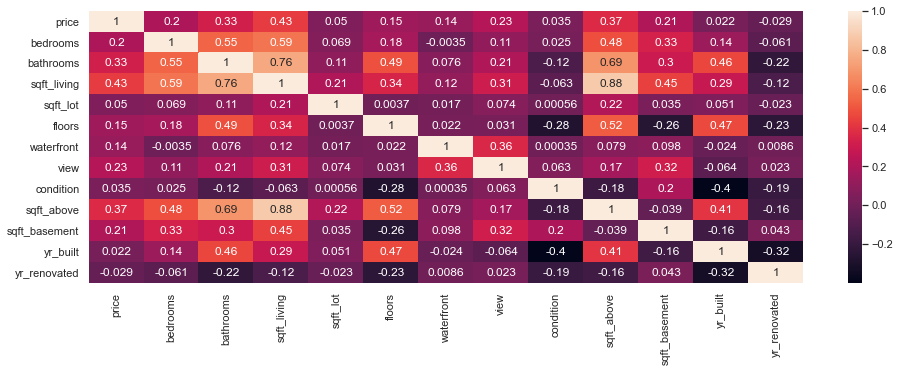

In [7]:
plt.figure(figsize=(16,5))
corr_mat=data.corr()
sns.heatmap(corr_mat,annot = True)

In [8]:
import scipy.stats as st
import pylab

((array([-3.61414049, -3.37750595, -3.24701759, ...,  3.24701759,
          3.37750595,  3.61414049]),
  array([  370,   380,   420, ...,  9640, 10040, 13540], dtype=int64)),
 (915.1478605219629, 2139.3469565217392, 0.9495253688853059))

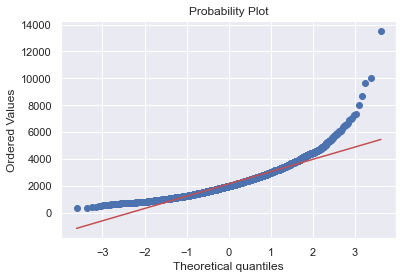

In [9]:
st.probplot(data.sqft_living,dist='norm',plot=pylab)

In [10]:
z=st.boxcox(data.sqft_living)
z

(array([8.270696  , 9.6098173 , 8.75243442, ..., 9.34824287, 8.85847689,
        8.41011451]),
 0.03764210483442871)

((array([-3.61414049, -3.37750595, -3.24701759, ...,  3.24701759,
          3.37750595,  3.61414049]),
  array([ 6.62334436,  6.65667817,  6.78207574, ..., 10.95679613,
         11.01426414, 11.43972055])),
 (0.5717077402194961, 8.771814214314407, 0.9994437633991173))

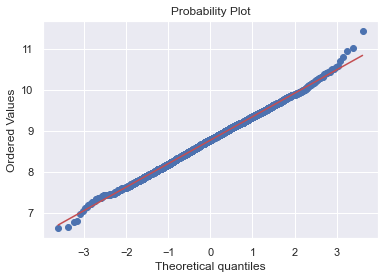

In [11]:
st.probplot(z[0],dist='norm',plot=pylab)

In [12]:
data.pop('sqft_living')
data.insert(4,'sqft_living',z[0])

In [13]:
x=data.price.round()

In [14]:
data.pop('price')
data.insert(1,'price',x)

In [15]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,8.270696,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,9.609817,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,8.752434,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,8.799831,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,8.759306,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308167.0,3.0,1.75,8.427673,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.0,3.0,2.50,8.383346,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.0,3.0,2.50,9.348243,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.0,4.0,2.00,8.858477,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [16]:
data.skew(axis=0)

price            24.790933
bedrooms          0.456447
bathrooms         0.616033
sqft_living       0.000303
sqft_lot         11.307139
floors            0.551441
waterfront       11.682901
view              3.341586
condition         0.959068
sqft_above        1.494211
sqft_basement     1.642732
yr_built         -0.502155
yr_renovated      0.385919
dtype: float64

((array([-3.61414049, -3.37750595, -3.24701759, ...,  3.24701759,
          3.37750595,  3.61414049]),
  array([       0.,        0.,        0., ...,  7062500., 12899000.,
         26590000.])),
 (346661.39057952166, 551962.9889130435, 0.6144528585474082))

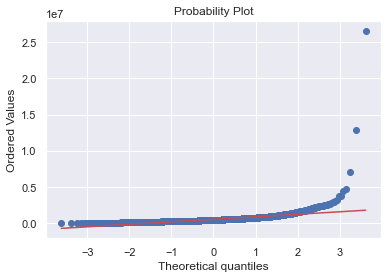

In [17]:
st.probplot(data['price'],dist='norm',plot=pylab)

In [18]:
data['price'].min()

0.0

In [19]:
data['price'].median()

460943.5

In [20]:
data['price'] = data['price'].map( lambda x : data.price.median() if x == 0 else x)

In [21]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,8.270696,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,9.609817,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,8.752434,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,8.799831,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,8.759306,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308167.0,3.0,1.75,8.427673,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.0,3.0,2.50,8.383346,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.0,3.0,2.50,9.348243,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.0,4.0,2.00,8.858477,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [22]:
data.price.min()

7800.0

((array([-3.61414049, -3.37750595, -3.24701759, ...,  3.24701759,
          3.37750595,  3.61414049]),
  array([7.8000e+03, 8.0000e+04, 8.3000e+04, ..., 7.0625e+06, 1.2899e+07,
         2.6590e+07])),
 (339658.4187580899, 556873.0392391304, 0.6050758214190447))

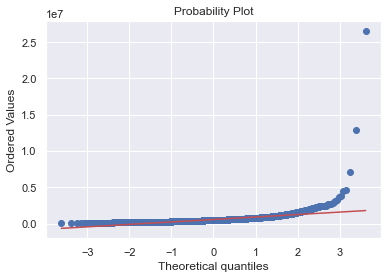

In [23]:
st.probplot(data['price'],dist='norm',plot=pylab)

(array([6.7043606 , 7.133674  , 6.72523962, ..., 6.77115156, 6.59973644,
       6.61983489]), -0.11383260237751598)


((array([-3.61414049, -3.37750595, -3.24701759, ...,  3.24701759,
          3.37750595,  3.61414049]),
  array([5.61755224, 6.35485426, 6.36501608, ..., 7.32568407, 7.42238053,
         7.53007623])),
 (0.12062862139633432, 6.795668167360162, 0.9930875296396058))

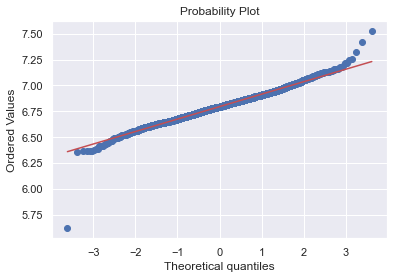

In [24]:
p=st.boxcox(data['price'])
print(p)
st.probplot(p[0],dist='norm',plot=pylab)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

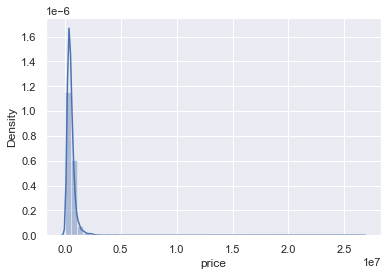

In [25]:
sns.distplot(data.price)

In [26]:
data.pop('price')
data.insert(1,'price',p[0])

In [27]:
data.skew(axis=0)

price            -0.047112
bedrooms          0.456447
bathrooms         0.616033
sqft_living       0.000303
sqft_lot         11.307139
floors            0.551441
waterfront       11.682901
view              3.341586
condition         0.959068
sqft_above        1.494211
sqft_basement     1.642732
yr_built         -0.502155
yr_renovated      0.385919
dtype: float64

((array([-3.61414049, -3.37750595, -3.24701759, ...,  3.24701759,
          3.37750595,  3.61414049]),
  array([    638,     681,     704, ...,  478288,  641203, 1074218],
        dtype=int64)),
 (18761.607149992768, 14852.51608695652, 0.5225150541036659))

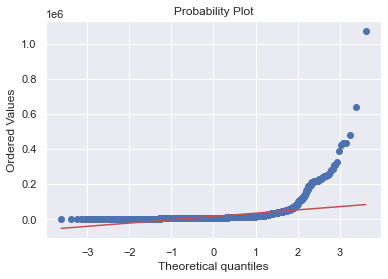

In [28]:
st.probplot(data['sqft_lot'],dist='norm',plot=pylab)

(array([4.41720332, 4.44304386, 4.49448066, ..., 4.39349346, 4.38223271,
       4.42181255]), -0.18232037149263566)


((array([-3.61414049, -3.37750595, -3.24701759, ...,  3.24701759,
          3.37750595,  3.61414049]),
  array([3.79523133, 3.81520473, 3.82528549, ..., 4.97944308, 5.00574504,
         5.04876295])),
 (0.16688063343274032, 4.408104656008597, 0.9781338314654394))

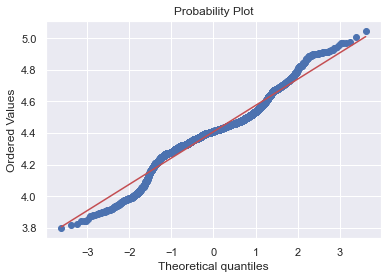

In [29]:
q=st.boxcox(data['sqft_lot'])
print(q)
st.probplot(q[0],dist='norm',plot=pylab)

In [30]:
data.pop('sqft_lot')
data.insert(5,'sqft_lot',q[0])

((array([-3.61414049, -3.37750595, -3.24701759, ...,  3.24701759,
          3.37750595,  3.61414049]),
  array([1. , 1. , 1. , ..., 3. , 3.5, 3.5])),
 (0.46962598615252443, 1.5120652173913043, 0.8719107119112202))

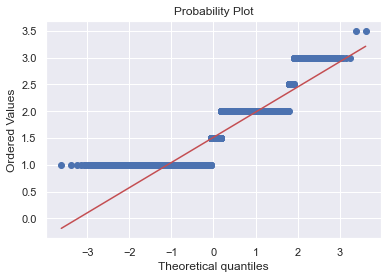

In [31]:
st.probplot(data.floors,dist='norm',plot=pylab)

(array([0.36523284, 0.58107621, 0.        , ..., 0.58107621, 0.        ,
       0.58107621]), -0.5247571411403124)


((array([-3.61414049, -3.37750595, -3.24701759, ...,  3.24701759,
          3.37750595,  3.61414049]),
  array([0.        , 0.        , 0.        , ..., 0.83494083, 0.91814128,
         0.91814128])),
 (0.24939515221435912, 0.2941361324771878, 0.8610460307051956))

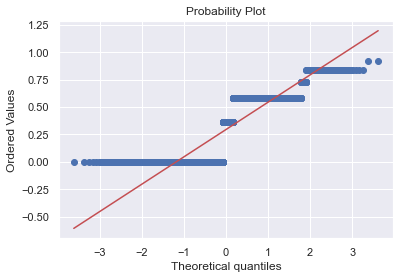

In [32]:
w=st.boxcox(data['floors'])
print(w)
st.probplot(w[0],dist='norm',plot=pylab)

In [33]:
data.pop('floors')
data.insert(6,'floors',w[0])

In [34]:
st.skew(data.floors)

0.10480134982379963

In [35]:
st.skew(w[0])

0.10480134982379963

((array([-3.61414049, -3.37750595, -3.24701759, ...,  3.24701759,
          3.37750595,  3.61414049]),
  array([ 370,  380,  420, ..., 7680, 8020, 9410], dtype=int64)),
 (814.2782728314147, 1827.2654347826087, 0.9438768855845321))

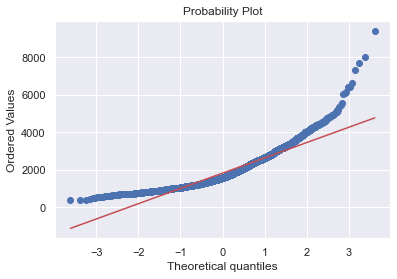

In [36]:
st.probplot(data.sqft_above,dist='norm',plot=pylab)

((array([-3.61414049, -3.37750595, -3.24701759, ...,  3.24701759,
          3.37750595,  3.61414049]),
  array([3.25987633, 3.26685113, 3.29265471, ..., 3.83553159, 3.84122458,
         3.86175382])),
 (0.08079623043171048, 3.5894148061182958, 0.997026836919605))

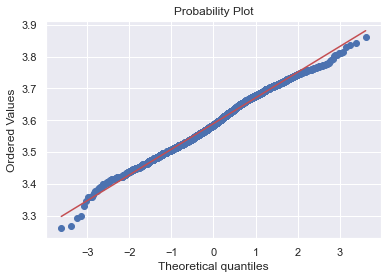

In [37]:
x=st.boxcox(data.sqft_above)
x
st.probplot(x[0],dist='norm',plot=pylab)

In [38]:
data.pop('sqft_above')
data.insert(10,'sqft_above',x[0])

In [39]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,6.704361,3.0,1.50,8.270696,4.417203,0.365233,0,0,3,3.552761,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,7.133674,5.0,2.50,9.609817,4.443044,0.581076,0,4,5,3.715950,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,6.725240,3.0,2.00,8.752434,4.494481,0.000000,0,0,4,3.621418,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,6.772847,3.0,2.25,8.799831,4.420081,0.000000,0,0,4,3.493439,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,6.833669,4.0,2.50,8.759306,4.470892,0.000000,0,0,4,3.520484,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,6.700672,3.0,1.75,8.427673,4.373843,0.000000,0,0,4,3.575864,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,6.827240,3.0,2.50,8.383346,4.408645,0.581076,0,0,3,3.569413,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,6.771152,3.0,2.50,9.348243,4.393493,0.581076,0,0,3,3.697741,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,6.599736,4.0,2.00,8.858477,4.382233,0.000000,0,0,3,3.507504,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [40]:
feature_name=['sqft_living','sqft_lot','floors','sqft_above']
X=data[feature_name]

In [41]:
X.head()

,sqft_living,sqft_lot,floors,sqft_above
0,8.270696,4.417203,0.365233,3.552761
1,9.609817,4.443044,0.581076,3.715950
2,8.752434,4.494481,0.000000,3.621418
3,8.799831,4.420081,0.000000,3.493439
4,8.759306,4.470892,0.000000,3.520484


In [45]:
y=data['price']

In [42]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

x_scaled = scaler.fit_transform(X)

In [46]:
# from _ import _
#specify the model. 
#For model reproducibility, set a numeric value for random_state when specifying the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.25,random_state=200)

# Fit the model
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [47]:
reg.score(x_train,y_train)

0.4520266804286982

In [48]:
reg.score(x_test,y_test)

0.44112795042034214

In [49]:
def adj_r2(x,y):
    r2=reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [50]:
adj_r2(x_test,y_test)

0.43917555898076255

In [51]:
y_pred=reg.predict(x_test)
y_pred

array([6.76069721, 6.74256563, 6.80891604, ..., 6.79976891, 6.82094963,
       6.72802756])

In [52]:
from sklearn.metrics import mean_squared_error as mse
z=mse(y_test,y_pred)
z

0.008129827542215189

In [53]:
s=np.sqrt(z)
s                 ##Root mean square

0.09016555629626642

In [54]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test, y_pred)

0.07039219756600484

In [55]:
def MAPE(y_actual,y_predicted):
    mape = np.mean(np.abs((y_actual-y_predicted)/y_actual))
    return mape

In [56]:
MAPE(y_test,y_pred)

0.010371842733165153

In [57]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [58]:
a=mape(y_test,y_pred)
a

0.01037184273316514